In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

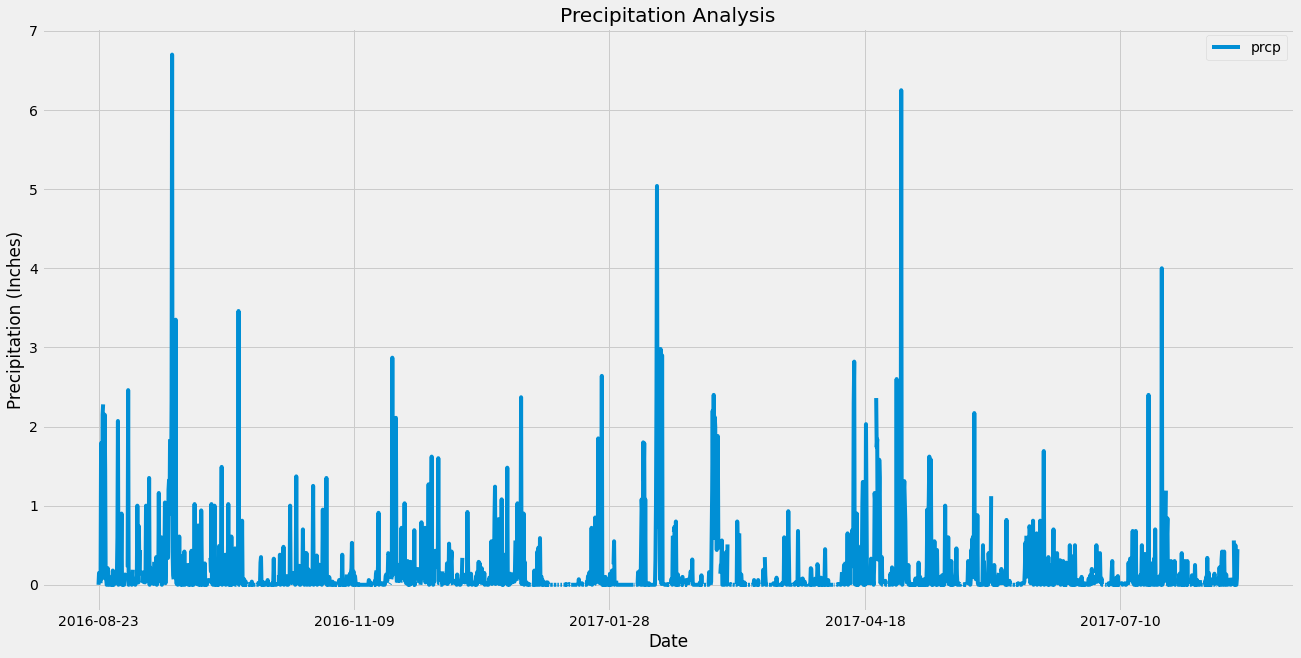

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
#one_year

# Perform a query to retrieve the data and precipitation scores
precip_data = (session.query(Measurement.date, Measurement.prcp)
              .filter(Measurement.date >= one_year)
              .order_by(Measurement.date)
              .all())
#precip_data

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data)
precip_df.set_index('date', inplace=True)
#precip_df

# Sort the dataframe by date
precip_df.sort_index(ascending=True)
#precip_df

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation Analysis", figsize=(20,10))
plt.ylabel("Precipitation (Inches)")
plt.xlabel("Date")
plt.savefig("precipitation.png")
plt.show()


In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Measurement.station).distinct().count()
stations

9

In [42]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = (session.query(Measurement.station, func.count(Measurement.station))
               .group_by(Measurement.station)
               .order_by(func.count(Measurement.station).desc())
               .all())
most_active           

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = func.min(Measurement.tobs)
max_temp = func.max(Measurement.tobs)
avg_temp = func.avg(Measurement.tobs)

min_max_avg_temp = session.query(min_temp, max_temp, avg_temp).filter(Measurement.station == "USC00519281").all()
min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

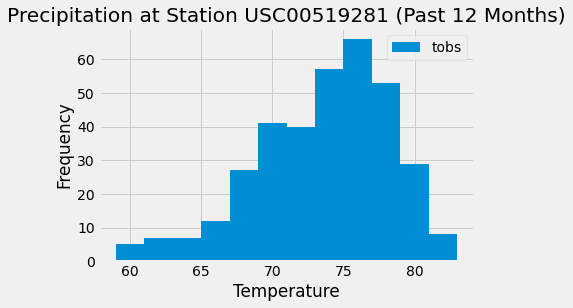

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = (session.query(Measurement.date, Measurement.tobs)
       .filter(Measurement.date >= one_year)
       .filter(Measurement.station == "USC00519281")
       .order_by(Measurement.date)
       .all())
#tobs

#create data frame & sort
tobs_df = pd.DataFrame(tobs)
tobs_df.set_index('date', inplace=True)
tobs_df.sort_index(ascending=True)
#tobs_df


#plot data
tobs_df.plot(kind='hist', bins=12, title="Precipitation at Station USC00519281 (Past 12 Months)")
plt.xlabel("Temperature")
plt.savefig("Precipitation at Station USC00519281 (Past 12 Months)")
plt.show()

# Close session

In [59]:
# Close Session
session.close()